<a href="https://colab.research.google.com/github/hamydang16/Data-Analysis/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
#add when combine
from scipy.stats import bootstrap, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data

In [46]:
#import data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Ask A Manager Salary Survey 2021 (Responses).xlsx')

# Data cleaning

In [47]:
#basic info
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28046 entries, 0 to 28045
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                --------------  -----         
 0   Timestamp                                                                                                                                                                                                                             28046 non-null  datetime64[ns]
 1   How old are you?                                                                        

In [49]:
df.describe()

,Timestamp,"What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits."
count,28046,2.804600e+04,2.075800e+04
mean,2021-05-14 05:03:42.304699136,1.476194e+05,1.816757e+04
min,2021-04-27 11:02:09.743000,0.000000e+00,0.000000e+00
25%,2021-04-27 14:21:21.677500160,5.400000e+04,0.000000e+00
50%,2021-04-28 13:56:13.594000128,7.500000e+04,2.000000e+03
75%,2021-04-29 20:15:03.869000192,1.100000e+05,1.000000e+04
max,2024-06-05 02:38:39.491000,8.700000e+08,1.200000e+08
std,NaN,5.409612e+06,8.342138e+05


In [50]:
df.shape

(28046, 18)

## Duplicate

In [8]:
df[df.duplicated()]

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)


## Clean column name

In [51]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [52]:
new_col_names = ['Timestamp', 'Age range', 'Industry',
       'Job title',
       'Job title context',
       'Annual salary',
       'Additional monetary compensation',
       'Currency',
       'Other currency',
       'Income additional context',
       'Country',
       'State',
       'City',
       'YOE (Overall)',
       'YOE (Field)',
       'Eduacation (Highest complete)',
       'Gender', 'Race']

In [53]:
#rename columns that are too long
df.columns = new_col_names

In [54]:
df.head()

,Timestamp,Age range,Industry,Job title,Job title context,Annual salary,Additional monetary compensation,Currency,Other currency,Income additional context,Country,State,City,YOE (Overall),YOE (Field),Eduacation (Highest complete),Gender,Race
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


## Clean values of columns

### Age range

In [60]:
df['Age range'].value_counts()

,count
Age range,
25-34,12649
35-44,9895
45-54,3188
18-24,1214
55-64,992
65 or over,94
under 18,14


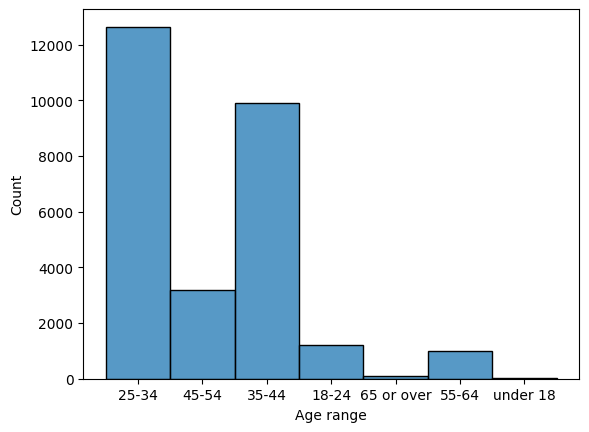

In [63]:
sns.histplot(df['Age range']);

### Industry

In [64]:
#Group the non-top 25 industries into others
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x not in df['Industry'].value_counts().head(25).index else x)

In [69]:
df['Industry'].str.lower().value_counts()

,count
Industry,
computing or tech,4694
education (higher education),2463
nonprofits,2418
others,2290
health care,1894
government and public administration,1889
"accounting, banking & finance",1804
engineering or manufacturing,1694
"marketing, advertising & pr",1133


### Job title

In [70]:
df['Job title'].value_counts()

,count
Job title,
Software Engineer,286
Project Manager,230
Director,198
Senior Software Engineer,196
Program Manager,152
...,...
Residential Therapist,1
Labour Relations Officer,1
veterinary assistant,1


In [20]:
#fill na of currency column with the other currency column
df['Currency'] = df['Currency'].fillna(df['Other currency'])